# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [19]:
!pip install -U pip
!pip install -U setuptools wheel
!pip uninstall -y numpy pandas autogluon
!pip install numpy==1.24.4 pandas==1.5.3
!pip install "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
!pip install kaggle
# Without --no-cache-dir, smaller aws instances may have trouble installing

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: pandas 2.2.3
Uninstalling pandas-2.2.3:
  Successfully uninstalled pandas-2.2.3
Found existing installation: autogluon 1.3.1
Uninstalling autogluon-1.3.1:
  Successfully uninstalled autogluon-1.3.1
  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached pandas-1.5.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
Using cached pandas-1.5.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pandas]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogluon-multimodal 1.3.1 requires 

ERROR: Operation cancelled by user
^C
^C


### Setup Kaggle API Key

In [17]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [13]:
import json
kaggle_username = "khujaevah"
kaggle_key = "ab45ac309dc2538edf1be001b5b6fcd3"

with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the [bike sharing demand competition](https://www.kaggle.com/c/bike-sharing-demand) and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [14]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [1]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [2]:
train = pd.read_csv("train.csv", parse_dates=["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv", parse_dates=["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [4]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are predicting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [26]:
train["datetime"] = pd.to_datetime(
    pd.to_numeric(train["datetime"], errors="coerce"),
    unit="ns",
    errors="coerce"
)

train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["dayofweek"] = train["datetime"].dt.dayofweek

train_data = train.drop(columns=drop_cols + ["datetime"])

predictor = TabularPredictor(
    label=label,
    eval_metric="root_mean_squared_error"
).fit(
    train_data=train_data,
    time_limit=600,
    presets="best_quality",
    dynamic_stacking=False,
    num_stack_levels=1
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250609_002147"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.94 GB / 12.67 GB (86.3%)
Disk Space Avail:   66.48 GB / 107.72 GB (61.7%)
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/AutogluonModels/ag-20250609_002147"
Train Data Rows:    10886
Train Data Columns: 13
Label Column:       count
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If

### Review AutoGluon's training run with ranking of models that did the best.

In [27]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -32.358972  root_mean_squared_error      47.073843  495.904932                0.000807           0.033878            3       True         13
1      WeightedEnsemble_L2  -32.614792  root_mean_squared_error      45.466988  367.359539                0.001289           0.084986            2       True          8
2          CatBoost_BAG_L2  -32.699127  root_mean_squared_error      46.031159  411.834953                0.051966          44.482094            2       True         12
3          LightGBM_BAG_L2  -32.890523  root_mean_squared_error      46.128839  400.329954                0.149647          32.977095            2       True         10
4        LightGBMXT_BAG_L2  -33.432387  root_mean_squared_error      46.405328  402.517309   

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -119.63405162718274,
  'KNeighborsDist_BAG_L1': -114.77840507599475,
  'LightGBMXT_BAG_L1': -34.98702485133657,
  'LightGBM_BAG_L1': -34.4606015662463,
  'RandomForestMSE_BAG_L1': -38.99390790550913,
  'CatBoost_BAG_L1': -33.97488364238959,
  'ExtraTreesM

### Create predictions from test dataset

In [30]:
test["datetime"] = pd.to_datetime(
    pd.to_numeric(test["datetime"], errors="coerce"),
    unit="ns",
    errors="coerce"
)

test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["dayofweek"] = test["datetime"].dt.dayofweek

test_data = test.drop(columns=["datetime"])

predictions = predictor.predict(test_data)
predictions.head()

,count
0,13.024370
1,3.891909
2,2.857147
3,3.345394
4,3.508969


#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [31]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

,count
count,6493.000000
mean,189.546158
std,173.199509
min,-9.172724
25%,47.325428
50%,146.454056
75%,277.480835
max,888.500122


In [32]:
# How many negative values do we have?
(predictions < 0).sum()

10

In [33]:
# Set them to zero
predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [34]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [35]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 1.01MB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [36]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                        description           status                     publicScore  privateScore  
--------------  --------------------------  --------------------  -------------------------  -----------  ------------  
submission.csv  2025-06-09 01:09:52.770000  first raw submission  SubmissionStatus.COMPLETE  0.46573      0.46573       


#### Initial score of `?`
0.46573

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'hour'}>],
       [<Axes: title={'center': 'dayofweek'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

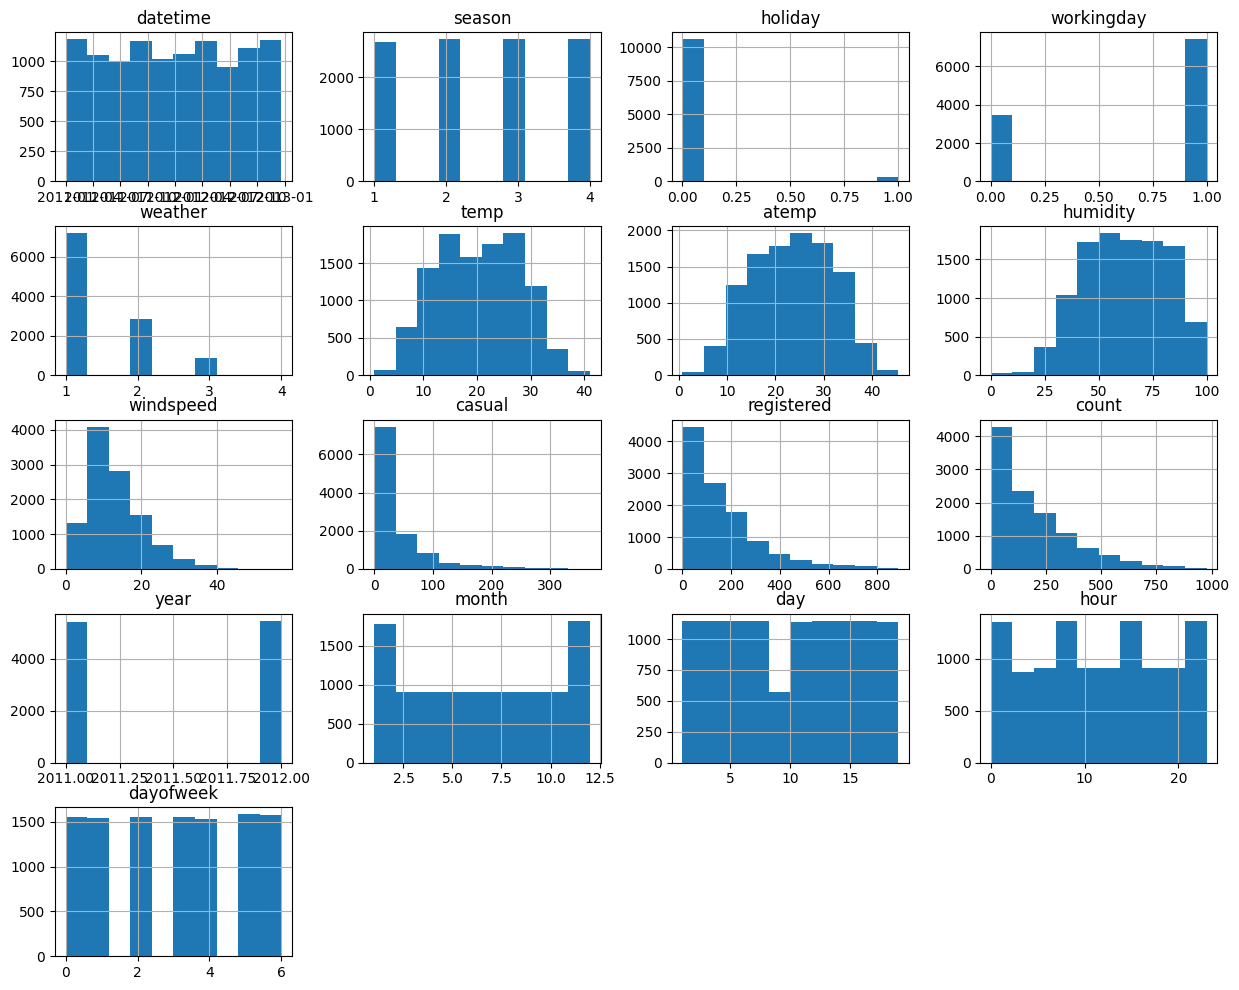

In [37]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(15, 12))

In [38]:
# create a new feature
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])
train['hour'] = train['datetime'].dt.hour
test['hour'] = test['datetime'].dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [39]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [40]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'dayofweek'}>, <Axes: >]], dtype=object)

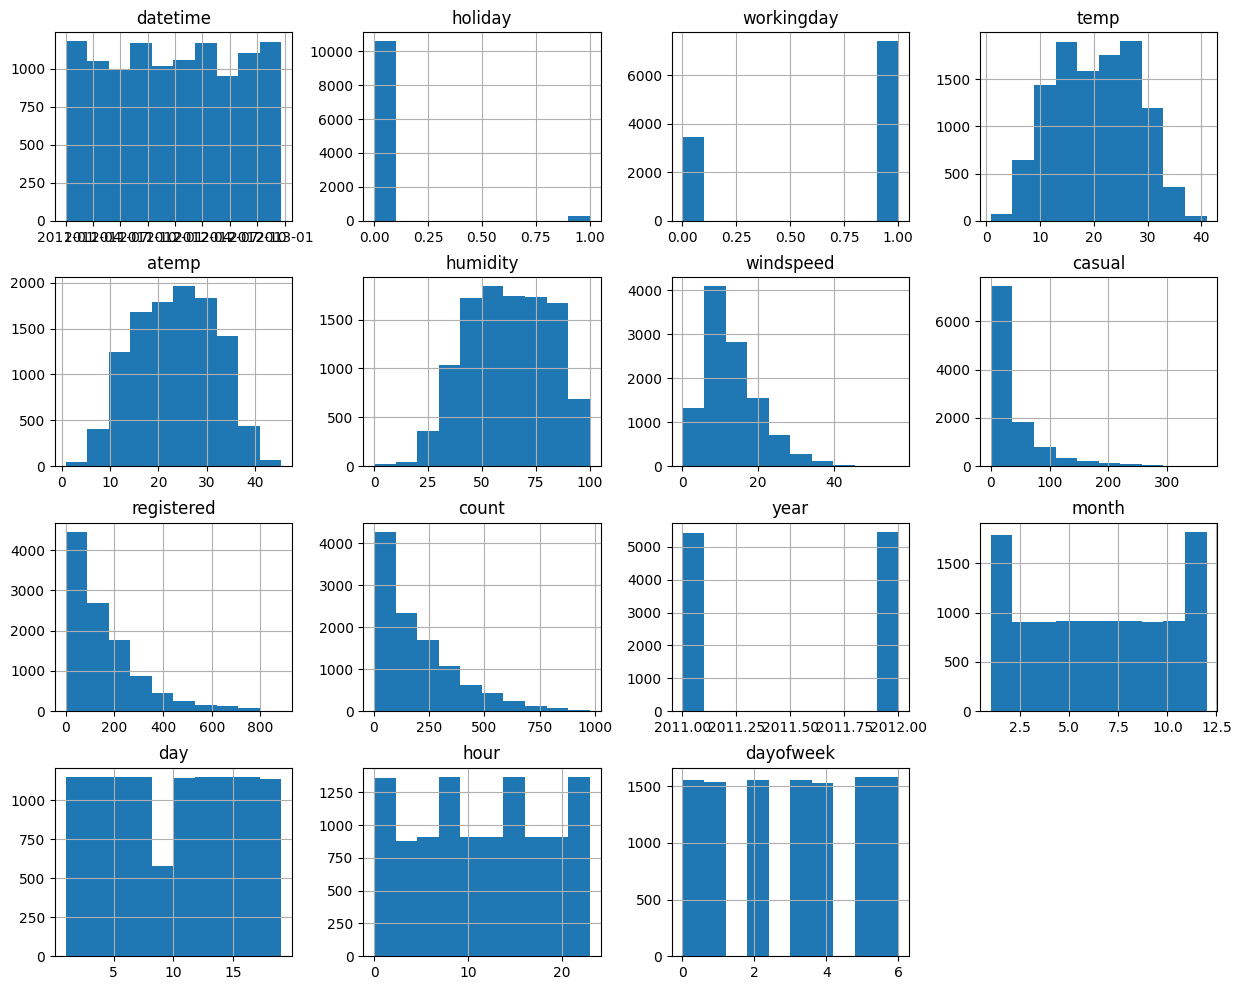

In [41]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(15, 12))

## Step 5: Rerun the model with the same settings as before, just with more features

In [54]:
features_to_drop = ["datetime", "timestamp_ns", "casual", "registered"]
train_data = train.drop(columns=features_to_drop)

predictor_new_features = TabularPredictor(
    label="count",
    eval_metric="root_mean_squared_error",
).fit(
    train_data=train_data,
    time_limit=600,
    presets="best_quality",
    feature_generator=None,
    dynamic_stacking=False
)


No path specified. Models will be saved in: "AutogluonModels/ag-20250609_023338"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       9.91 GB / 12.67 GB (78.2%)
Disk Space Avail:   64.67 GB / 107.72 GB (60.0%)
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/AutogluonModels/ag-20250609_023338"
Train Data Rows:    10886
Train Data Columns: 18
Label Column:       count
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 

In [55]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -32.764863  root_mean_squared_error      66.519064  560.021218                0.000857           0.037504            3       True         13
1      WeightedEnsemble_L2  -33.022646  root_mean_squared_error      63.217652  375.313320                0.001341           0.042751            2       True          8
2          CatBoost_BAG_L2  -33.164848  root_mean_squared_error      64.959122  420.793995                0.186973          45.497012            2       True         12
3          LightGBM_BAG_L2  -33.424126  root_mean_squared_error      65.002362  410.735640                0.230213          35.438657            2       True         10
4   RandomForestMSE_BAG_L2  -33.533395  root_mean_squared_error      65.684757  435.672641   

/usr/local/lib/python3.11/dist-packages/autogluon/tabular/predictor/predictor.py:3161: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  plot_tabular_models(


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -118.23364119359923,
  'KNeighborsDist_BAG_L1': -113.31330570812396,
  'LightGBMXT_BAG_L1': -44.83314823488013,
  'LightGBM_BAG_L1': -34.36145097302841,
  'RandomForestMSE_BAG_L1': -39.15870504024487,
  'CatBoost_BAG_L1': -34.92440541637948,
  'ExtraTrees

In [56]:
# Remember to set all negative values to zero
predictions[predictions < 0] = 0

In [57]:
# Same submitting predictions
submission_new_features = test.copy()
submission_new_features["count"] = predictions
submission_new_features = submission_new_features[["datetime", "count"]]
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [58]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 1.08MB/s]
Successfully submitted to Bike Sharing Demand

In [59]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description           status                     publicScore  privateScore  
---------------------------  --------------------------  --------------------  -------------------------  -----------  ------------  
submission_new_features.csv  2025-06-09 02:49:57.293000  new features          SubmissionStatus.COMPLETE  0.46573      0.46573       
submission.csv               2025-06-09 01:09:52.770000  first raw submission  SubmissionStatus.COMPLETE  0.46573      0.46573       


#### New Score of `?`
0.46573


## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [68]:
predictor_new_hpo= TabularPredictor(
    label="count",
    eval_metric="root_mean_squared_error"
).fit(
    train_data=train_data,
    time_limit=600,
    presets="best_quality",
    feature_generator=None,
    dynamic_stacking=False
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250609_025840"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       9.41 GB / 12.67 GB (74.3%)
Disk Space Avail:   63.56 GB / 107.72 GB (59.0%)
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/AutogluonModels/ag-20250609_025840"
Train Data Rows:    10886
Train Data Columns: 18
Label Column:       count
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 

In [69]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -33.187607  root_mean_squared_error      68.614750  454.248127                0.001239           0.076500            3       True         11
1      WeightedEnsemble_L2  -33.454580  root_mean_squared_error      65.064702  342.655345                0.000830           0.019964            2       True          6
2          CatBoost_BAG_L2  -33.479449  root_mean_squared_error      67.510264  404.927433                0.109440          62.257088            2       True         10
3          LightGBM_BAG_L2  -33.941229  root_mean_squared_error      67.594563  375.206188                0.193738          32.535843            2       True          8
4   RandomForestMSE_BAG_L2  -34.168921  root_mean_squared_error      68.504071  391.914539   

/usr/local/lib/python3.11/dist-packages/autogluon/tabular/predictor/predictor.py:3161: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  plot_tabular_models(


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -118.23364119359923,
  'KNeighborsDist_BAG_L1': -113.31330570812396,
  'LightGBMXT_BAG_L1': -44.83314823488013,
  'LightGBM_BAG_L1': -34.36145097302841,
  'RandomForestMSE_BAG_L1': -39.15870504024487,
  'WeightedEnsemble_L2': -33.454579590463794,
  'LightGBMXT_BAG_L2': -34.88019892633582,
  'LightGBM_BAG_L2': -33.941228914019916,
  'RandomForestMSE_BAG_L2': -3

In [79]:
# Remember to set all negative values to zero
predictions[predictions < 0] = 0
print(predictions.head())


0    13.024370
1     3.891909
2     2.857147
3     3.345394
4     3.508969
Name: count, dtype: float32


In [87]:
submission_new_hpo["count"] = predictions.round()
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [88]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 448k/448k [00:00<00:00, 2.44MB/s]
Successfully submitted to Bike Sharing Demand

In [89]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_hpo.csv       2025-06-09 03:20:04.930000  new features with hyperparameters  SubmissionStatus.ERROR                                
submission_new_features.csv  2025-06-09 02:49:57.293000  new features                       SubmissionStatus.COMPLETE  0.46573      0.46573       
submission.csv               2025-06-09 01:09:52.770000  first raw submission               SubmissionStatus.COMPLETE  0.46573      0.46573       


#### New Score of `?`
0.46573

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

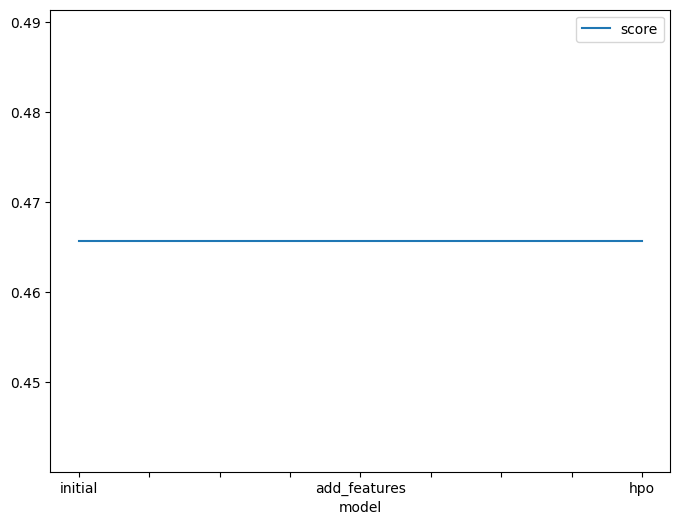

In [93]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [0.46573, 0.46573, 0.46573]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

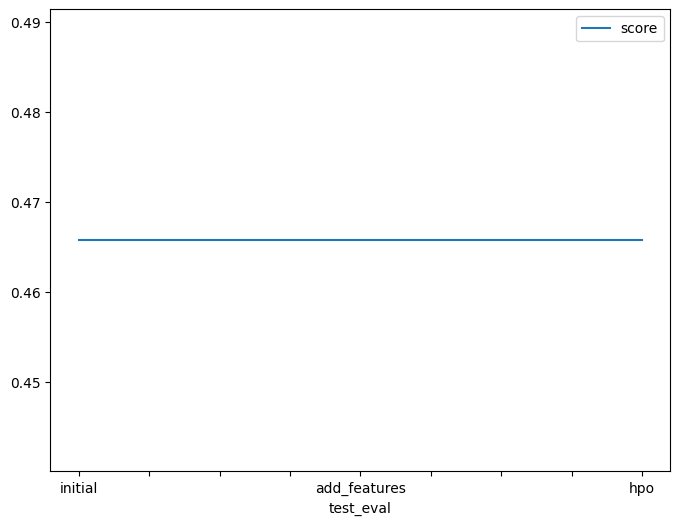

In [92]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [0.46573, 0.46573, 0.46573]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [90]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": [0.46573, 0.46573, 0.46573],
    "hpo2": [0.46573, 0.46573, 0.46573],
    "hpo3": [0.46573, 0.46573, 0.46573],
    "score": [0.46573, 0.46573, 0.46573]
})

,model,hpo1,hpo2,hpo3,score
0,initial,0.46573,0.46573,0.46573,0.46573
1,add_features,0.46573,0.46573,0.46573,0.46573
2,hpo,0.46573,0.46573,0.46573,0.46573
